In [14]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm

import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault)

#for simple fitting
import scipy.integrate as spi

%matplotlib inline


In [15]:
#import data
long_df=pd.read_csv('data/long_df.csv')
long_df_wtot=pd.read_csv('data/long_df_wtot.csv')
more_correlates=pd.read_csv('data/more_correlates.csv')

#define some constant names

celltypes=['TN', 'TSCM','TCM', 'TTM','TEM'] #cell type names
states=['T10_mode','T20_mode','T30_mode','T40_mode','T50_mode'] #state names, node mode

cellcolors=['deepskyblue','green','gold','orange','crimson']
cellnames=['$\mathrm{T_N}$','$\mathrm{T_{SCM}}$','$\mathrm{T_{CM}}$','$\mathrm{T_{TTM}}$','$\mathrm{T_{EM}}$']

my_pal=dict(zip(celltypes,cellcolors)) #color dictionary


In [16]:
#pick the best model
mname='6diff-corrmat_TRECs'


In [17]:
#info for monolix model
param_df=pd.read_csv('../monolix2/'+mname+'/IndividualParameters/estimatedIndividualParameters.txt')


In [18]:
#get list of parameter names
pnames=[]
for cc in list(param_df.columns):
    if '_mode' in cc:
        pnames.append(cc)
for ss in states:
    pnames.remove(ss)
    
pdf = param_df[pnames]
pdf.head()


,th1_mode,th2_mode,th3_mode,th4_mode,th5_mode,phiTRECs_mode,phi12_mode,phi13_mode,phi23_mode,phi34_mode,phi35_mode,phi45_mode
0,0.197440,-0.270637,0.873238,-0.131809,-1.78789,83.6081,0.169792,8.51988,1.171800,0.829651,0.112441,0.205355
1,0.136467,-0.345389,0.581824,0.321432,-1.75792,15.4361,0.025358,4.97420,1.214320,1.093830,0.167030,0.243413
2,0.193583,-0.190513,0.666805,-0.007701,-1.68645,46.9894,0.079756,2.55956,1.056880,1.099790,0.174976,0.473010
3,0.157357,-0.145474,0.874428,0.251514,-1.67155,472.5170,0.084671,2.02086,1.045110,1.280090,0.189406,0.677487
4,0.024696,1.183010,0.693927,0.987610,-1.55779,28.7401,0.138203,4.56380,0.695897,0.964067,0.184193,1.703300


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


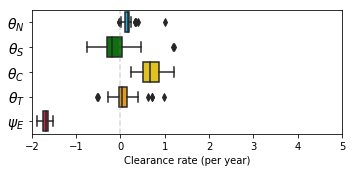

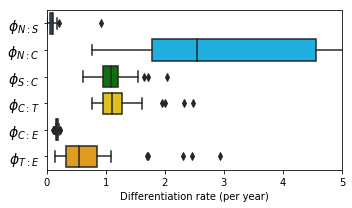

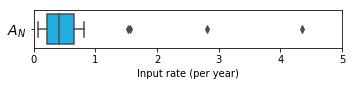

In [19]:
#BOXPLOTS of all rates

#plot clearance rates 
rates=['th1_mode','th2_mode','th3_mode','th4_mode','th5_mode',]
fancy_names=[r'$\theta_N$',r'$\theta_S$',r'$\theta_C$',r'$\theta_T$',r'$\psi_E$']
my_pal_th=dict(zip(rates,cellcolors))

plt.figure(figsize=(5,2.5))
sns.boxplot(data=pdf[rates],width=0.8,palette=my_pal_th,vert=False)
plt.axvline(0,color='gray',ls='--',alpha=0.3)
plt.yticks(range(len(rates)),fancy_names,rotation=0,fontsize=14)
plt.xlabel('Clearance rate (per year)')
plt.xlim([-2,5])
plt.tight_layout()
plt.savefig('figures/BM_th.pdf',dpi=600)

#plot differentiation rates 
rates = ['phi12_mode','phi13_mode','phi23_mode', 'phi34_mode','phi35_mode', 'phi45_mode']
fancy_names=[r'$\phi_{N:S}$',r'$\phi_{N:C}$',r'$\phi_{S:C}$',r'$\phi_{C:T}$',r'$\phi_{C:E}$',r'$\phi_{T:E}$']
my_pal_phi=dict(zip(rates,['deepskyblue','deepskyblue','green','gold','gold','orange']))

plt.figure(figsize=(5,3))
sns.boxplot(data=pdf[rates],width=0.8,palette=my_pal_phi,vert=False)
plt.axvline(0,color='gray',ls='--',alpha=0.3)
plt.yticks(range(len(rates)),fancy_names,rotation=0,fontsize=14)
plt.xlabel('Differentiation rate (per year)')
plt.xlim([0,5])
plt.tight_layout()
plt.savefig('figures/BM_phi_box.pdf',dpi=600)

#plot input "TRECs" rate
rates = ['phiTRECs_mode']
fancy_names=[r'$A_N$']
my_pal_phi=dict(zip(rates,['deepskyblue']))

plt.figure(figsize=(5,1.3))
sns.boxplot(data=pdf[rates]/np.mean(param_df['T10_mode']),width=0.8,palette=my_pal_phi,vert=False)
plt.axvline(0,color='gray',ls='--',alpha=0.3)
plt.yticks(range(len(rates)),fancy_names,rotation=0,fontsize=14)
plt.xlabel('Input rate (per year)')
plt.xlim([0,5])
plt.tight_layout()
plt.savefig('figures/BM_input_box.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.YTick at 0x7fd60b221978>,
 <a list of 12 Text yticklabel objects>)

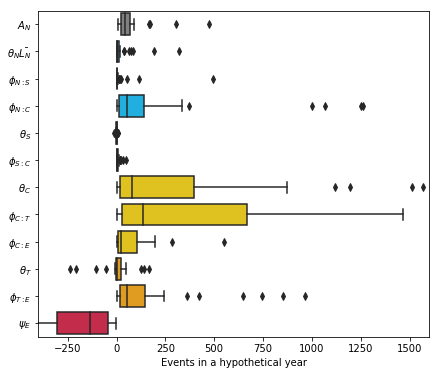

In [9]:
#absolute contribution day 0

absdf=pd.DataFrame()
for i in range(5):
    absdf['th'+str(i+1)] = pdf['th'+str(i+1)+'_mode']*param_df['T'+str(i+1)+'0_mode']
    
absdf['phi12'] = pdf['phi12_mode']*param_df['T10_mode']
absdf['phi13'] = pdf['phi13_mode']*param_df['T10_mode']
absdf['phi23'] = pdf['phi23_mode']*param_df['T20_mode']
absdf['phi34'] = pdf['phi34_mode']*param_df['T30_mode']
absdf['phi35'] = pdf['phi35_mode']*param_df['T30_mode']
absdf['phi45'] = pdf['phi45_mode']*param_df['T40_mode']
absdf['phiIN'] = pdf['phiTRECs_mode']

my_pal = dict(zip(list(absdf.columns)[:5],cellcolors))
my_pal.update(dict(zip(list(absdf.columns)[5:],['deepskyblue','deepskyblue','green','gold','gold','orange','gray'])))

plt.figure(figsize=(7,6))
sns.boxplot(absdf[['phiIN','th1','phi12','phi13','th2','phi23','th3','phi34','phi35','th4','phi45','th5']],palette=my_pal,vert=False)
#sns.stripplot(data=absdf.abs(), size=4, color=".3", linewidth=0,palette=my_pal)

fancy_names=[r'$A_N$',r'$\theta_N\bar{L_N}$',r'$\phi_{N:S}$',r'$\phi_{N:C}$',
             r'$\theta_S$',r'$\phi_{S:C}$',
             r'$\theta_C$',r'$\phi_{C:T}$',r'$\phi_{C:E}$',
             r'$\theta_T$',r'$\phi_{T:E}$',r'$\psi_E$']

#plt.semilogy()
plt.xlim([-400,1600])
plt.xlabel('Events in a hypothetical year')

plt.yticks(range(len(fancy_names)),fancy_names)
#event_names = []
#plt.xticks(range(len(absdf)),['Thymic input','Naive'])

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


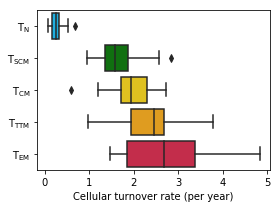

In [23]:
#get turnover rate and plot
rate_df = long_df[~np.isnan(long_df['cellular_hl_days'])]
PIDS=rate_df['pat_id'].unique()

turnrate_l=[]
for pind,p in enumerate(PIDS):
    tdf=rate_df[rate_df['pat_id']==p]
    turnrate = np.log(2)/tdf['cellular_hl_days'].unique()*365
    turnrate_l.append(list(turnrate))
aL_df = pd.DataFrame(turnrate_l,columns=celltypes)

plt.figure(figsize=(4,3))
sns.boxplot(aL_df,palette=dict(zip(celltypes,cellcolors)),vert=False)
plt.yticks(range(5),cellnames)
plt.xlabel('Cellular turnover rate (per year)')
plt.tight_layout()
plt.savefig('figures/turnover_rates2.pdf',dpi=600)


In [25]:
#plot each fit separately relative to trial initiation

#subfraction model 
#copied and pasted from monolix with conversion to X and dY
def model(X,t,th1,th2,th3,th4,th5,phiTRECs,phi12,phi13,phi23,phi34,phi35,phi45):

    T1,T2,T3,T4,T5 = X

    ddt_T1 = phiTRECs + th1*T1 - phi12*T1 - phi13*T1         
    ddt_T2 = th2*T2 + phi12*T1 - phi23*T2
    ddt_T3 = th3*T3 + phi23*T2 - phi34*T3 - phi35*T3 + phi13*T1 
    ddt_T4 = th4*T4 + phi34*T3 - phi34*T4
    ddt_T5 = th5*T5 + phi45*T4 + phi35*T3

    return np.array([ddt_T1,ddt_T2,ddt_T3,ddt_T4,ddt_T5])


In [100]:
#solve ODES a bunch of times and calculate fraction from prolif/death/longevity

tsim=np.linspace(0,3,1000) #simulate over whole interval
dt=tsim[1]
alls=[]; 

prolifs=np.zeros([len(PIDS),5]); deaths=np.zeros([len(PIDS),5]); 
diffs_in=np.zeros([len(PIDS),5]); diffs_out=np.zeros([len(PIDS),5]); neteff=np.zeros([len(PIDS),5])

for pind,p in enumerate(PIDS):
    
    tdf_p = param_df[param_df['id']==p].iloc[0]

    th=np.array(tdf_p[pnames].iloc[:5])
    phi=np.array(tdf_p[pnames].iloc[5:])
    
    X0=np.array(tdf_p[states]) #don't actually track total here
    sol2=spi.odeint(model, X0, tsim, tuple(list(th)+list(phi)))
    
    TNt,TSt,TCt,TTt,TEt = sol2.T

    aTNt=np.mean(TNt)
    aTSt=np.mean(TSt)
    aTCt=np.mean(TCt)
    aTTt=np.mean(TTt)
    aTEt=np.mean(TEt)

    #calculate the number of events in a time interval TT
    # celltype/milCD4 * events/year * 1 year 
    TT=1 #days in a year
    
    #impute turnover rate
    turnrates = turnrate_l[pind]   

    #aL=turnrates
    #dL=aL-th #th=aL-dL
    
    dLN = turnrates[0] - tdf_p['phi12_mode'] - tdf_p['phi13_mode']
    dLS = turnrates[1] - tdf_p['phi23_mode']
    dLC = turnrates[2] - tdf_p['phi34_mode'] - tdf_p['phi35_mode']
    dLT = turnrates[3] - tdf_p['phi45_mode']
    dLE = turnrates[4]
        
    diffs_in[pind,0] = tdf_p['phiTRECs_mode']*TT #thymic input
    diffs_in[pind,1] = tdf_p['phi12_mode']*aTNt*TT #1:2
    diffs_in[pind,2] = tdf_p['phi13_mode']*aTNt*TT + tdf_p['phi23_mode']*aTSt*TT #1:3 + 2:3
    diffs_in[pind,3] = tdf_p['phi34_mode']*aTCt*TT #3:4
    diffs_in[pind,4] = tdf_p['phi35_mode']*aTCt*TT + tdf_p['phi45_mode']*aTTt*TT #3:5 + 4:5
    
    aLN = turnrates[0] - tdf_p['phiTRECs_mode']/aTNt
    aLS = turnrates[1] - tdf_p['phi12_mode']*aTNt/aTSt
    aLC = turnrates[2] - (tdf_p['phi13_mode']*aTNt + tdf_p['phi23_mode']*aTSt)/aTCt
    aLT = turnrates[3] - (tdf_p['phi34_mode']*aTCt)/aTTt
    aLE = turnrates[4] - (tdf_p['phi35_mode']*aTCt + tdf_p['phi45_mode']*aTTt)/aTEt
    
    diffs_out[pind,0] = tdf_p['phi12_mode']*aTNt*TT + tdf_p['phi13_mode']*aTNt*TT #1:2 & 1:3
    diffs_out[pind,1] = tdf_p['phi23_mode']*aTSt*TT #2:3
    diffs_out[pind,2] = tdf_p['phi34_mode']*aTCt*TT + tdf_p['phi35_mode']*aTCt*TT #1:2 & 1:3
    diffs_out[pind,3] = tdf_p['phi45_mode']*aTTt*TT 

    prolifs[pind,:]=np.array([aLN*aTNt,aLS*aTSt,aLC*aTCt,aLT*aTTt,aLE*aTEt])*TT #proliferations averaged over all times
    
    deaths[pind,:]=np.array([dLN*aTNt,dLS*aTSt,dLC*aTCt,dLT*aTTt,dLE*aTEt])*TT #deaths

    #check this all sums to zero per my calculation of equilibrium with rates
    #neteff[pind,:]=prolifs[pind,:]+diffs_in[pind,:]-diffs_out[pind,:]-deaths[pind,:]   #X = Xpro+Xdiffin-Xdiffout+rest          


In [212]:
#Different claculation!!
#solve ODES a bunch of times and calculate fraction from prolif/death/longevity

tsim=np.linspace(0,3,1000) #simulate over whole interval
dt=tsim[1]
alls=[]; 

aLcalc_l=[]; dLcalc_l=[]
prolifs=np.zeros([len(PIDS),5]); deaths=np.zeros([len(PIDS),5]); 
diffs_in=np.zeros([len(PIDS),5]); diffs_out=np.zeros([len(PIDS),5]); neteff=np.zeros([len(PIDS),5])

for pind,p in enumerate(PIDS):
    
    tdf_p = param_df[param_df['id']==p].iloc[0]

    th=np.array(tdf_p[pnames].iloc[:5])
    phi=np.array(tdf_p[pnames].iloc[5:])
    
    X0=np.array(tdf_p[states]) #don't actually track total here
    sol2=spi.odeint(model, X0, tsim, tuple(list(th)+list(phi)))
    
    TNt,TSt,TCt,TTt,TEt = sol2.T

    aTNt=np.mean(TNt)
    aTSt=np.mean(TSt)
    aTCt=np.mean(TCt)
    aTTt=np.mean(TTt)
    aTEt=np.mean(TEt)

    #calculate the number of events in a time interval TT
    # celltype/milCD4 * events/year * 1 year 
    TT=1 #year
    
    #impute turnover rate
    turnrates = turnrate_l[pind]   

    #aL=turnrates
    #dL=aL-th #th=aL-dL
    
    aLN = turnrates[0] - tdf_p['phiTRECs_mode']/aTNt
    aLS = turnrates[1] - tdf_p['phi12_mode']*aTNt/aTSt
    aLC = turnrates[2] - (tdf_p['phi13_mode']*aTNt + tdf_p['phi23_mode']*aTSt)/aTCt
    aLT = turnrates[3] - tdf_p['phi34_mode']*aTCt/aTTt
    aLE = turnrates[4] - (tdf_p['phi35_mode']*aTCt + tdf_p['phi45_mode']*aTTt)/aTEt

    dLN = turnrates[0] - tdf_p['phi12_mode'] - tdf_p['phi13_mode']
    dLS = turnrates[1] - tdf_p['phi23_mode']
    dLC = turnrates[2] - tdf_p['phi34_mode'] - tdf_p['phi35_mode']
    dLT = turnrates[3] - tdf_p['phi45_mode']
    dLE = turnrates[4]
    
    aLcalc_l.append([aLN,aLS,aLC,aLT,aLE])
    dLcalc_l.append([dLN,dLS,dLC,dLT,dLE])
    
    diffs_in[pind,0] = tdf_p['phiTRECs_mode']*TT #thymic input
    diffs_in[pind,1] = tdf_p['phi12_mode']*aTNt*TT #1:2
    diffs_in[pind,2] = tdf_p['phi13_mode']*aTNt*TT + tdf_p['phi23_mode']*aTSt*TT #1:3 + 2:3
    diffs_in[pind,3] = tdf_p['phi34_mode']*aTCt*TT #3:4
    diffs_in[pind,4] = tdf_p['phi35_mode']*aTCt*TT + tdf_p['phi45_mode']*aTTt*TT #3:5 + 4:5

    diffs_out[pind,0] = tdf_p['phi12_mode']*aTNt*TT + tdf_p['phi13_mode']*aTNt*TT #1:2 & 1:3
    diffs_out[pind,1] = tdf_p['phi23_mode']*aTSt*TT #2:3
    diffs_out[pind,2] = tdf_p['phi34_mode']*aTCt*TT + tdf_p['phi35_mode']*aTCt*TT #1:2 & 1:3
    diffs_out[pind,3] = tdf_p['phi45_mode']*aTTt*TT 

    prolifs[pind,:]=np.array([aLN*aTNt,aLS*aTSt,aLC*aTCt,aLT*aTTt,aLE*aTEt])*TT #proliferations averaged over all times
    
    deaths[pind,:]=np.array([dLN*aTNt,dLS*aTSt,dLC*aTCt,dLT*aTTt,dLE*aTEt])*TT #deaths

    #check this all sums to zero per my calculation of equilibrium with rates
    #neteff[pind,:]=prolifs[pind,:]+diffs_in[pind,:]-diffs_out[pind,:]-deaths[pind,:]   #X = Xpro+Xdiffin-Xdiffout+rest          

#reconfigure negative rates
deaths[prolifs<0]+=-prolifs[prolifs<0]
prolifs[deaths<0]+=-deaths[deaths<0]
prolifs[prolifs<0]=0
deaths[deaths<0]=0

#do percentage cacluations
prol_pct = prolifs/(prolifs+diffs_in)*100
dfin_pct = diffs_in/(prolifs+diffs_in)*100
dfout_pct = diffs_out/(diffs_out+deaths)*100
death_pct = deaths/(diffs_out+deaths)*100

In [213]:
#name two ways, short and long
mechs=['Diff-in','Prolif','Diff-out','Death']
mechs1=['Differentiation in','Proliferation','Differentiation out','Death']


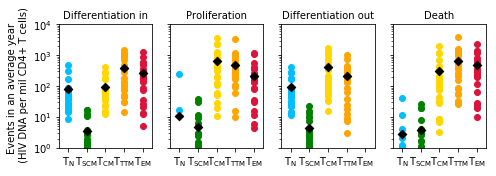

In [214]:
#plot absolute values of events in a year
fig,axarr=plt.subplots(1,4,figsize=(7,2.5),sharex=True,sharey=True)

for ic in range(5):
    for iy,yf in enumerate([diffs_in[:,ic],prolifs[:,ic],diffs_out[:,ic],deaths[:,ic]]):
        axarr[iy].scatter(np.ones(len(yf))*(ic+1),yf,color=cellcolors[ic])
        axarr[iy].scatter((ic+1),np.nanmean(yf),marker='D',color='k')

axarr[0].set_xlim([0.5,5.5])
axarr[0].semilogy()
axarr[0].set_ylim([1,1e4])
axarr[0].set_ylabel('Events in an average year \n (HIV DNA per mil CD4+ T cells)')
axarr[0].set_xticks(np.arange(1,6))
axarr[0].set_xticklabels(cellnames)

for im,m in enumerate(mechs1):
    axarr[im].set_title(m,fontsize=10)

plt.tight_layout()
plt.savefig('figures/mech_absolute.pdf',dpi=600)


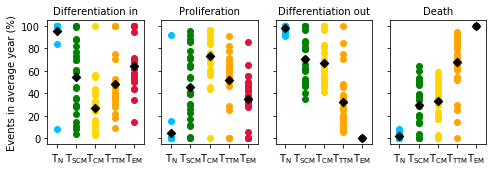

In [216]:
#pct plot
fig,axarr=plt.subplots(1,4,figsize=(7,2.5),sharex=True,sharey=True)

for ic in range(5):
    for iy,yf in enumerate([dfin_pct[:,ic],prol_pct[:,ic],dfout_pct[:,ic],death_pct[:,ic]]):
        axarr[iy].scatter(np.ones(len(yf))*(ic+1),yf,color=cellcolors[ic])
        axarr[iy].scatter((ic+1),np.nanmean(yf),marker='D',color='k')

axarr[0].set_xlim([0.5,5.5])
axarr[0].set_ylim([-5,105])
axarr[0].set_ylabel('Events in average year (%)')
axarr[0].set_xticks(np.arange(1,6))
axarr[0].set_xticklabels(cellnames)

for im,m in enumerate(mechs1):
    axarr[im].set_title(m,fontsize=10)

plt.tight_layout()
plt.savefig('figures/mech%.pdf',dpi=600)


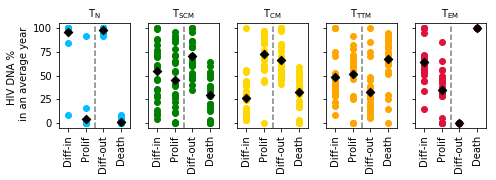

In [218]:
#pct plot split by celltype

fig,axarr=plt.subplots(1,5,figsize=(7,2.6),sharex=True,sharey=True)

for ic in range(5):
    for iy,yf in enumerate([dfin_pct[:,ic],prol_pct[:,ic],dfout_pct[:,ic],death_pct[:,ic]]):
        axarr[ic].scatter(np.ones(len(yf))*(iy+1),yf,color=cellcolors[ic])
        axarr[ic].scatter((iy+1),np.nanmean(yf),marker='D',color='k')
    axarr[ic].set_title(cellnames[ic],fontsize=10)
    axarr[ic].axvline(2.5,ls='--',color='gray')
    axarr[ic].set_xticks(np.arange(1,5))
    axarr[ic].set_xticklabels(mechs,rotation =90)

axarr[0].set_xlim([0.5,4.5])
axarr[0].set_ylim([-5,105])
axarr[0].set_ylabel('HIV DNA % \n in an average year')
plt.tight_layout()
plt.savefig('figures/mech%2.pdf',dpi=600)


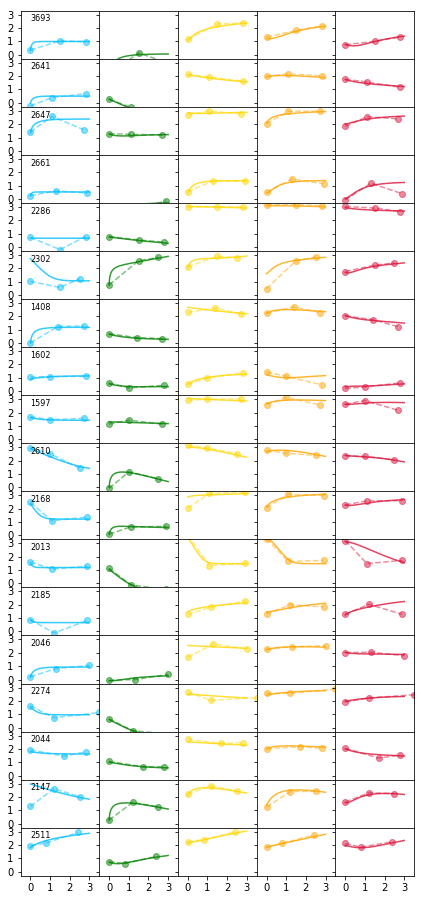

In [172]:
#plot each fit separately relative to trial initiation
#SQUEEZED together into 1 plot
#log scale and fixed y axis, so fits look really good but lots of white space

N=18
fig,axarr=plt.subplots(N,len(celltypes),figsize=(6,N*0.7),sharex=True,sharey=True,)

tsim=np.linspace(0,3,1000) #simulate over 3 years

ip=0
pp=0
while ip<N:
    p=long_df['pat_id'].unique()[pp]
    pp+=1
    tdf=long_df[long_df['pat_id']==p]
    if ~np.isnan(tdf['DNApmCD4']).any():# and len(tdf)==15: #only plot 3 time opint individuals
                
        #solve model with initial conditions and model parameters from plist df
        plist=np.array(param_df[param_df['id']==p][pnames].iloc[0])
        X0=np.array(param_df[param_df['id']==p][states].iloc[0])
        sol=spi.odeint(model, X0, tsim, tuple(plist))

        for ic,ct in enumerate(celltypes):
            tdf2=tdf[tdf['celltype']==ct]
            axarr[ip][ic].plot(tdf2['time_postART_years']-np.min(tdf2['time_postART_years']),np.log10(tdf2['DNApmCD4']),
                           marker='o',alpha=0.5,color=cellcolors[ic],ls='--')#,label=p)
            axarr[ip][ic].plot(tsim,np.log10(sol[:,ic]),ls='-',alpha=0.8,color=cellcolors[ic])#,label='model')
        axarr[ip][0].annotate(str(p),[0,2.5],fontsize=8)
        ip+=1
axarr[0][0].set_yticks([0,1,2,3,4])
axarr[0][0].set_ylim([-0.3,3.3])
axarr[0][0].set_xticks(range(4))
axarr[0][0].set_xlim([-0.5,3.5])
fig.tight_layout()    
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('figures/fits_'+mname+'.pdf',dpi=600)



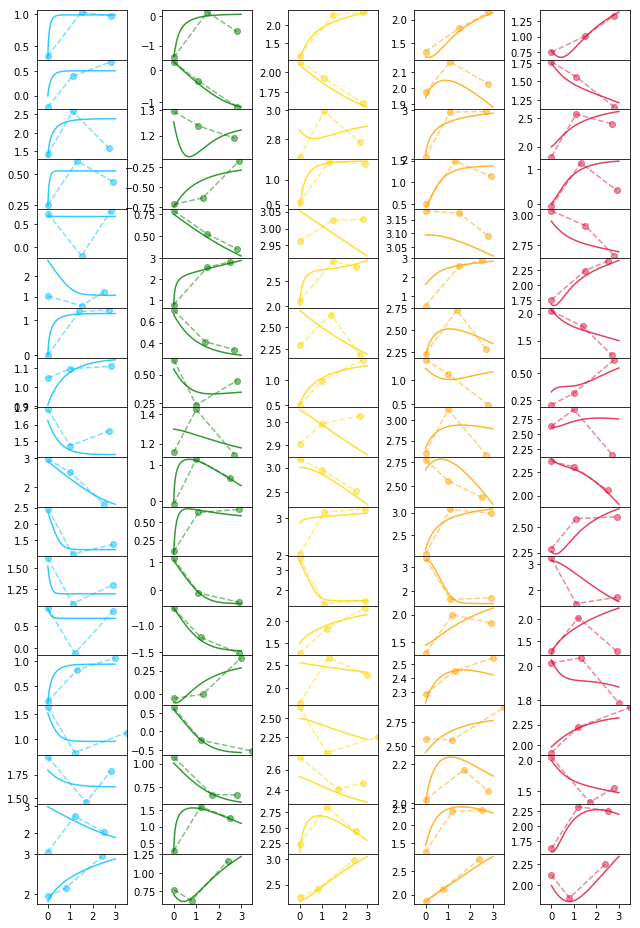

In [173]:
#plot each fit separately relative to trial initiation
#SQUEEZED together into 1 plot
#not fixed y axis, so can see lines better

N=18
fig,axarr=plt.subplots(N,len(celltypes),figsize=(9,13),sharex=True,sharey=False,)

tsim=np.linspace(0,3,1000) #simulate over 3 years

ip=0
pp=0
while ip<N:
    p=long_df['pat_id'].unique()[pp]
    pp+=1
    tdf=long_df[long_df['pat_id']==p]
    if ~np.isnan(tdf['DNApmCD4']).any():# and len(tdf)==15: #only plot 3 time opint individuals
                
        #solve model with initial conditions and model parameters from plist df
        plist=np.array(param_df[param_df['id']==p][pnames].iloc[0])
        X0=np.array(param_df[param_df['id']==p][states].iloc[0])
        sol=spi.odeint(model, X0, tsim, tuple(plist))

        for ic,ct in enumerate(celltypes):

            #get observation data and plot
            tdf2=tdf[tdf['celltype']==ct]

            axarr[ip][ic].plot(tdf2['time_postART_years']-np.min(tdf2['time_postART_years']),np.log10(tdf2['DNApmCD4']),
                           marker='o',alpha=0.5,color=cellcolors[ic],ls='--')#,label=p)

            #plot simulations
            axarr[ip][ic].plot(tsim,np.log10(sol[:,ic]),ls='-',alpha=0.8,color=cellcolors[ic])#,label='model')
        ip+=1
axarr[0][0].set_xticks(range(4))
axarr[0][0].set_xlim([-0.5,3.5])

fig.tight_layout()    
fig.subplots_adjust(wspace=0.4, hspace=0)

fig.savefig('figures/fits2_'+mname+'.pdf',dpi=600)



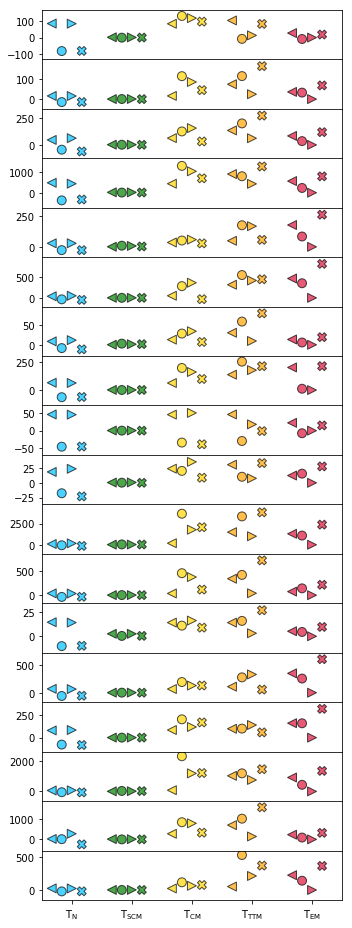

In [201]:
#plot each fit separately relative to trial initiation
#SQUEEZED together into 1 plot

fig,axarr=plt.subplots(N,1,figsize=(5,13),sharex=True,sharey=False,)

tsim=np.linspace(0,3,1000) #simulate over 3 years

ip=0
pp=0
while ip<N:
    p=long_df['pat_id'].unique()[pp]
    pp+=1
    tdf=long_df[long_df['pat_id']==p]
    if ~np.isnan(tdf['DNApmCD4']).any():# and len(tdf)==15: #only plot 3 time opint individuals
                
        axarr[ip].scatter(np.arange(5)-1/3,diffs_in[ip,:],c=cellcolors,marker='<',s=80,edgecolors='k',lw=1,alpha=0.7)
        axarr[ip].scatter(np.arange(5)-1/6,prolifs[ip,:],c=cellcolors,marker='o',s=80,edgecolors='k',lw=1,alpha=0.7)
        axarr[ip].scatter(np.arange(5),diffs_out[ip,:],c=cellcolors,marker='>',s=80,edgecolors='k',lw=1,alpha=0.7)
        axarr[ip].scatter(np.arange(5)+1/6,deaths[ip,:],c=cellcolors,marker='X',s=80,edgecolors='k',lw=1,alpha=0.7)        
        ip+=1
axarr[0].set_xticks(range(5))
axarr[0].set_xlim([-0.5,4.5])
axarr[0].set_xticklabels(cellnames,rotation=0)

fig.tight_layout()    
fig.subplots_adjust(wspace=0.4, hspace=0)

fig.savefig('figures/indivrates_'+mname+'.pdf',dpi=600)



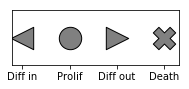

In [175]:
plt.figure(figsize=(3,1))
sz=500
plt.scatter(1,1,marker='<',c='gray',edgecolors='k',s=sz)
plt.scatter(2,1,marker='o',c='gray',edgecolors='k',s=sz)
plt.scatter(3,1,marker='>',c='gray',edgecolors='k',s=sz)
plt.scatter(4,1,marker='X',c='gray',edgecolors='k',s=sz)
plt.xticks([1,2,3,4],['Diff in','Prolif','Diff out','Death'])
plt.ylim([0.9999,1.0001])
plt.yticks([])
plt.savefig('figures/indivrateskey.pdf',dpi=600)


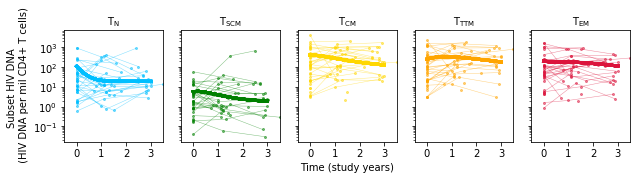

In [176]:
#show population average!

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)

tsim=np.linspace(0,3,1000) #simulate over 3 years

for p in list(long_df['pat_id'].unique()):
    
    tdf=long_df[long_df['pat_id']==p]

    
    #solve model with initial conditions and model parameters from plist df
    plist=np.array(np.mean(param_df[pnames]))
    X0=np.array(np.mean(param_df[states]))
    sol=spi.odeint(model, X0, tsim, tuple(plist))

    for ic,ct in enumerate(celltypes):

        #get observation data and plot
        tdf2=tdf[tdf['celltype']==ct]

        axarr[ic].plot(tdf2['time_postART_years']-np.min(tdf2['time_postART_years']),tdf2['DNApmCD4'],
                       marker='o',alpha=0.5,color=cellcolors[ic],ls='-',lw=0.5,markersize=2)#,label=p)

        #plot simulations
        axarr[ic].semilogy(tsim,sol[:,ic],ls='-',alpha=0.8,lw=3,color=cellcolors[ic])#,label='model')
        axarr[ic].set_title(cellnames[ic],fontsize=10)

axarr[0].set_xticks(range(4))
axarr[0].set_xlim([-0.5,3.5])
axarr[2].set_xlabel('Time (study years)')
axarr[0].set_ylabel('Subset HIV DNA \n (HIV DNA per mil CD4+ T cells)')

plt.tight_layout()    

plt.savefig('figures/fits2_pop.pdf',dpi=600)



In [1]:
plt.figure(figsize=(5,2))
#xx=1000
sz=100
for i in range(5):
    plt.scatter(x=i-1/4,s=sz,marker='<',c=cellcolors[i],edgecolors='k',y=np.mean(diffs_in,0)[i])
    plt.scatter(x=i-1/20,s=sz,marker='o',c=cellcolors[i],edgecolors='k',y=np.mean(prolifs,0)[i])
    plt.scatter(x=i+1/8,s=sz,marker='>',c=cellcolors[i],edgecolors='k',y=np.mean(diffs_out,0)[i])
    plt.scatter(x=i+1/4,s=sz,marker='X',c=cellcolors[i],edgecolors='k',y=np.mean(deaths,0)[i])
    
    #plt.plot([i-1/4,i-1/4],[0,np.mean(diffs_in,0)[i]],color=cellcolors[i],ls='-',alpha=0.5)
    #plt.plot([i,i],[0,np.mean(prolifs,0)[i]],color=cellcolors[i],ls='-',alpha=0.5)
    #plt.plot([i+1/8,i+1/8],[0,np.mean(diffs_out,0)[i]],color=cellcolors[i],ls='-',alpha=0.5)
    #plt.plot([i+1/4,i+1/4],[0,np.mean(deaths,0)[i]],color=cellcolors[i],ls='-',alpha=0.5)

#plt.grid('on')
#plt.ylim([0.9999,1.0001])
#plt.yticks([])
plt.xticks(range(5),cellnames)
plt.savefig('figures/indivrates.pdf',dpi=600)



NameError: name 'plt' is not defined

In [177]:
param_df[['id']+states+pnames].to_excel('BM_params.xls',)

In [178]:
#add clinical/biological info to a new matrix that we'll next merge into rates

more_correlates=pd.read_csv('data/more_correlates.csv')
more_correlates['id']=more_correlates['HOPE ID'] #to make the merge easier

corrdl1 = []

lct_names=''
for ip,p in enumerate(long_df['pat_id'].unique()):
    lct=[]
    lct_names=[]
    for ic,ct in enumerate(celltypes):
    
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
    
        tpre, TRECs, Gini, Age, chl, tpost = tdf[['preART_months','TRECs','GiniInd','Age_years','cellular_hl_days','time_postART_years']].iloc[0].values

        lct.append(chl)
        lct.append(Gini)
        lct_names.append(ct+'_hl')
        lct_names.append(ct+'_G')
    
    #tdf2=long_df_wtot[(long_df_wtot['celltype']=='total') & (long_df_wtot['pat_id']==p)]
    corrdl1.append([p,tpre,tpost, TRECs,Age]+lct)
        
corr1 = pd.DataFrame(corrdl1,columns=['id','preARTmo','postARTyr','TRECs','Age']+lct_names)

#update all correlates
more_correlates = pd.merge(more_correlates,corr1)

#merge to make the correlation between params and clinical vars
clincorr_df = pd.merge(more_correlates,param_df[pnames+['id']])

clincorr_df['CD4delta']=clincorr_df['CD4 T cell count Y1']-clincorr_df['CD4 Nadir']
clincorr_df.columns

#make the full correlation matrix
corr_mat = clincorr_df.corr(method='spearman').round(decimals=2)


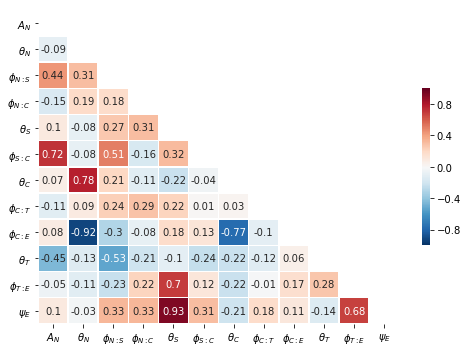

In [179]:
#check identifiability!

fancy_names=[r'$A_N$',r'$\theta_N$',r'$\phi_{N:S}$',r'$\phi_{N:C}$',
             r'$\theta_S$',r'$\phi_{S:C}$',
             r'$\theta_C$',r'$\phi_{C:T}$',r'$\phi_{C:E}$',
             r'$\theta_T$',r'$\phi_{T:E}$',r'$\psi_E$']

rowz=pnames
colz=pnames
tcmat=corr_mat.loc[rowz,colz] #temporary subset

maskz = np.triu(np.ones_like(tcmat, dtype=bool)) # Generate a mask for the upper triangle

plt.figure(figsize=(7,5))
sns.heatmap(tcmat,annot=True,vmin=-1,vmax=1,
            xticklabels=fancy_names,yticklabels=fancy_names,
            linewidths=.5, cbar_kws={"shrink": .5}, mask=maskz)
plt.tight_layout()
plt.savefig('figures/correlates_identifiability.pdf',dpi=600)


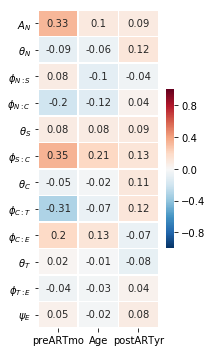

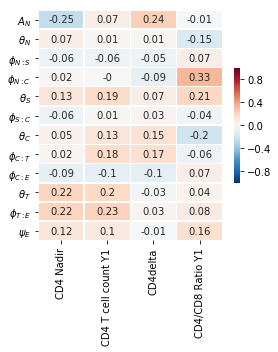

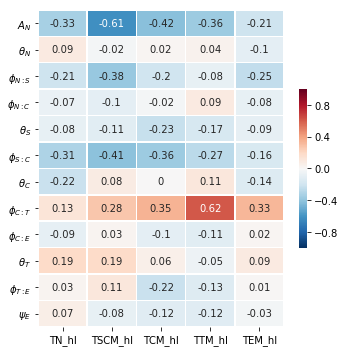

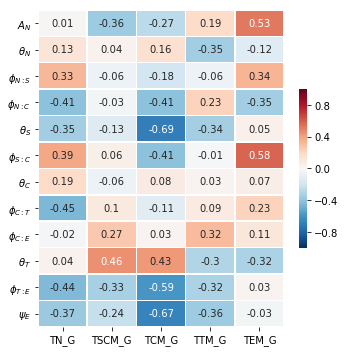

In [180]:
rowz=pnames
colz1=['preARTmo', 'Age', 'postARTyr']
colz2=['CD4 Nadir', 'CD4 T cell count Y1', 'CD4delta', 'CD4/CD8 Ratio Y1']
colz3=['TN_hl','TSCM_hl','TCM_hl','TTM_hl','TEM_hl']
colz4=['TN_G','TSCM_G','TCM_G','TTM_G','TEM_G']

for ii,colz in enumerate([colz1,colz2,colz3,colz4]):
    tcmat=corr_mat.loc[rowz,colz] #temporary subset
    plt.figure(figsize=(len(colz),5))
    sns.heatmap(tcmat,annot=True,vmin=-1,vmax=1,
                yticklabels=fancy_names,#yticklabels=fancy_names,
                linewidths=.5, cbar_kws={"shrink": .5})
    plt.tight_layout()
    plt.savefig('figures/correlates'+str(ii)+'.pdf',dpi=600)


In [199]:
### KNOCKOUTS

#function that makes plots for knockouts
def plotter():
    tsim=np.linspace(0,3,1000) #simulate over whole interval
    dt=tsim[1]

    start_sizes=[]
    final_sizes=[]

    NN=len(PIDS)

    fig,axarr=plt.subplots(1,5,figsize=(7,2),sharex=True,sharey=True)
    for pind,p in enumerate(PIDS[:NN]):

        tdf_p = param_df[param_df['id']==p]

        th=np.array(tdf_p[pnames].iloc[0,:5])
        phi=np.array(tdf_p[pnames].iloc[0,5:])

        #from before!
        aL = np.array(aLcalc_l[pind])
        dL = np.array(dLcalc_l[pind])
        
        #correct negatives
        dL[aL<0]+=-aL[aL<0]
        aL[dL<0]+=-dL[dL<0]
        
        aL[aL<0]=0
        dL[dL<0]=0
        
        #recalc with therapy
        th=aL/eps_aL_vec-dL
        phi=phi*eps_phi_vec

        X0=np.array(tdf_p[states].iloc[0]) #don't actually track total here

        sol=spi.odeint(model, X0, tsim, tuple(list(th)+list(phi)))

        ct_starts=[]; ct_finals=[]
        for ic,ct in enumerate(celltypes):
            axarr[ic].semilogy(tsim,sol[:,ic],ls='-',alpha=0.5,color=cellcolors[ic])#cz_list[pind])
            ct_starts.append(sol[ 0,ic])
            ct_finals.append(sol[-1,ic])

        start_sizes.append(ct_starts)
        final_sizes.append(ct_finals)

    #switch to array
    start_sizes=np.array(start_sizes)
    final_sizes=np.array(final_sizes)

    #axarr[2].set_xlabel('Time (study years)')
    #axarr[0].set_ylabel('Modeled HIV DNA \n per mil CD4+ T cell')
    axarr[0].set_ylim([1,1e4])

    for ic,ct in enumerate(celltypes):
        #axarr[ic].set_title(cellnames[ic])
        axarr[ic].boxplot([start_sizes[:,ic],final_sizes[:,ic]],positions=[0,3])#cz_list[pind])
        #axarr[ic].boxplot(final_sizes[:,ic],positions=[3])#cz_list[pind])
        p=st.mannwhitneyu(start_sizes[:,ic],final_sizes[:,ic])[1]
        if p<0.01:
            axarr[ic].annotate('p<0.01',[0.1,3e3])
        else:
            axarr[ic].annotate('p='+str(np.round(p,3)),[0.1,3e3])

    for ic,ct in enumerate(celltypes):
        axarr[ic].set_xticks(range(5))
        axarr[ic].set_xticklabels(range(5))
        axarr[ic].set_xlim([-0.3,3.3])
        
        
    

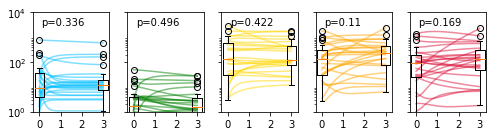

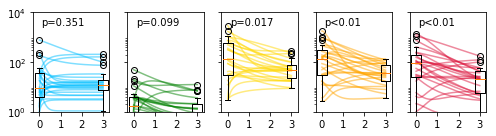

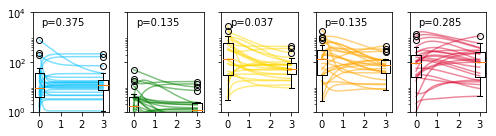

In [200]:
#solve ODES a bunch of times and calculate fraction from prolif/death/longevity

eps_aL_vec=np.array([1,1,1,1,1])
eps_phi_vec=np.array([1,1,1,1,1,1,1])
plotter()
plt.tight_layout()
plt.savefig('figures/knockout_control.pdf',dpi=600)

eps_aL_vec=np.array([2,2,2,2,2])
eps_phi_vec=np.array([1,1,1,1,1,1,1])
plotter()
plt.tight_layout()
plt.savefig('figures/knockout_aL2_all.pdf',dpi=600)

eps_aL_vec=np.array([1,1,1,1,1])
eps_phi_vec=np.array([2,2,2,2,2,2,2])
plotter()
plt.tight_layout()
plt.savefig('figures/knockout_phi2faster_all.pdf',dpi=600)




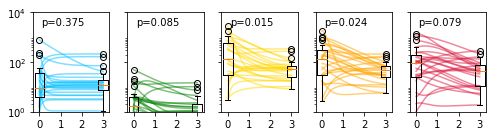

In [220]:
eps_aL_vec=np.ones(5)*1.5
eps_phi_vec=np.ones(7)*1.5
plotter()
plt.tight_layout()
plt.savefig('figures/knockout_combo1.2.pdf',dpi=600)
